<a href="https://colab.research.google.com/github/eloisemf/analise-lojas/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

### Importação dos dados



In [ ]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


Análise descritiva

In [ ]:
loja1.describe()

,Preço,Frete,Avaliação da compra,Quantidade de parcelas,lat,lon
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,650.491361,34.691805,3.976685,2.943196,-20.763366,-47.349385
std,819.582778,43.814183,1.415370,2.819897,5.372400,4.183180
min,10.070000,0.000000,1.000000,1.000000,-30.170000,-70.550000
25%,74.345000,4.141783,3.000000,1.000000,-22.250000,-48.790000
50%,313.750000,16.498835,5.000000,1.000000,-22.190000,-48.790000
75%,904.130000,48.050074,5.000000,4.000000,-18.100000,-44.380000
max,3969.380000,214.377060,5.000000,24.000000,1.410000,-36.590000


In [ ]:
loja1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


#1. Análise do faturamento


In [ ]:
lojas = [loja1, loja2, loja3, loja4]

In [ ]:
def soma(df: list) -> pd.Series:
  faturamento = {}
  for i, loja in enumerate(df):
    nome = f"loja{i+1}"
    faturamento[nome] = loja['Preço'].sum()
  return pd.Series(faturamento).rename('Faturamento total')
somas = soma(lojas).map(lambda x: f'R$ {x:.2f}')
somas


,Faturamento total
loja1,R$ 1534509.12
loja2,R$ 1488459.06
loja3,R$ 1464025.03
loja4,R$ 1384497.58


# 2. Vendas por Categoria


In [ ]:
def vendas_categoria(df: list) -> pd.DataFrame:
  vendas = {}
  for i, loja in enumerate(df):
    nome = f"loja{i+1}"
    vendas[nome] = loja.groupby('Categoria do Produto')['Produto'].count()
  return pd.DataFrame(vendas).sort_values(by=['loja1'], ascending=False)

vendas_categoria(lojas)

,loja1,loja2,loja3,loja4
Categoria do Produto,,,,
moveis,465,442,499,480
eletronicos,448,422,451,451
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
esporte e lazer,284,275,277,277
instrumentos musicais,182,224,177,170
livros,173,197,185,187
utilidades domesticas,171,181,177,201


# 3. Média de Avaliação das Lojas

In [ ]:
def avaliacao_media(df: list) -> pd.Series:
  media_loja = {}
  for i, loja in enumerate(df):
    nome = f"loja{i+1}"
    media_loja[nome] = loja['Avaliação da compra'].mean().round(2)
  return pd.Series(media_loja).rename('Avaliação média')

avaliacao_media(lojas)


,Avaliação média
loja1,3.98
loja2,4.04
loja3,4.05
loja4,4.00


# 4. Produtos Mais e Menos Vendidos

In [ ]:
def mais_menos(df: list) -> pd.DataFrame:
  vendas = {}
  for i, loja in enumerate(df):
    nome = f"loja{i+1}"
    produtos = loja.groupby('Produto')['Data da Compra'].count()
    vendas[nome] = {'Mais vendidos': produtos.idxmax(), 'Menos vendidos': produtos.idxmin()}

  return pd.DataFrame(vendas).T.rename_axis(None, axis=1)
maior_menor = mais_menos(lojas)
maior_menor

,Mais vendidos,Menos vendidos
loja1,Guarda roupas,Celular ABXY
loja2,Iniciando em programação,Jogo de tabuleiro
loja3,Kit banquetas,Blocos de montar
loja4,Cama box,Guitarra


# 5. Frete Médio por Loja


In [ ]:
def frete_medio(df: list) -> pd.Series:
  media_loja = {}
  for i, loja in enumerate(df):
    nome = f"loja{i+1}"
    media_loja[nome] = loja['Frete'].mean().round(2)
  return pd.Series(media_loja).rename('Frete médio')

frete = frete_medio(lojas)
frete

,Frete médio
loja1,34.69
loja2,33.62
loja3,33.07
loja4,31.28


## 6. Desempenho Geográfico

In [ ]:
vendas_local = loja1.groupby(['lat', 'lon'])['Produto'].count().reset_index()

fig = px.scatter_mapbox(vendas_local,
                        lat="lat",
                        lon="lon",
                        size="Produto",
                        color="Produto",
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        zoom=3,
                        mapbox_style="open-street-map",
                        title="Quantidade de Vendas por Localização",
                        labels={"Produto": "Quantidade de Vendas"})


fig.show()




---
---



## **Relatório de Análise de Desempenho das Lojas**

**1. Introdução**

O presente relatório tem como objetivo indicar ao Sr. João qual loja entre as quatro disponíveis (loja1, loja2, loja3 e loja4) apresenta melhor desempenho geral, considerando diversos indicadores de desempenho comercial: faturamento total, volume de vendas por categoria de produto, avaliação média dos clientes, produtos mais e menos vendidos, e frete médio. A análise visa embasar de forma clara e objetiva a decisão de venda da loja mais valorizada, com base em seus pontos fortes e fracos.

**2.1 Faturamento Total (em R$)**



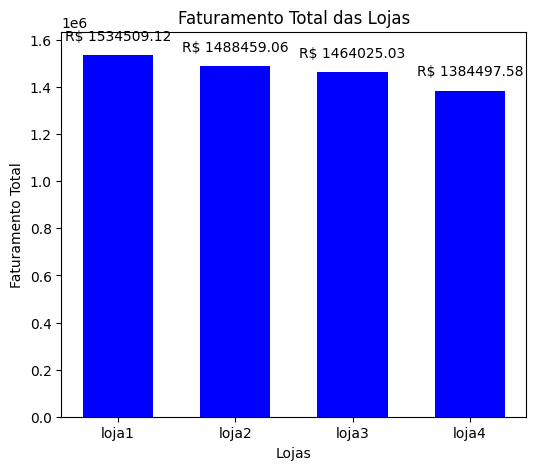

In [ ]:
faturamento_total = soma(lojas)

plt.figure(figsize=(6, 5))
plt.bar(faturamento_total.index, faturamento_total.values, color='blue', width=0.6)
plt.xlabel("Lojas")
plt.ylabel("Faturamento Total")
plt.title("Faturamento Total das Lojas")
plt.ylim(0, faturamento_total.max() + 100000)

for i, v in enumerate(faturamento_total.values):
    plt.text(i, v + 50000, f'R$ {v:.2f}', ha='center', va='bottom')

plt.show()

A Loja1 demonstra superioridade no faturamento total, configurando-se como a unidade de maior retorno bruto.

**2.2 Vendas por Categoria de Produto**

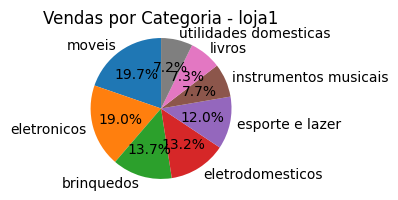

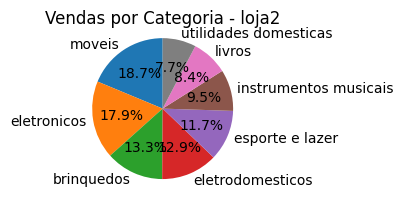

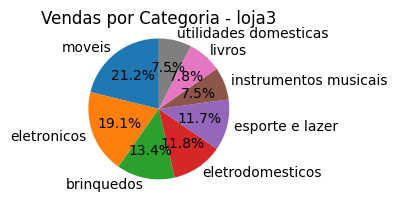

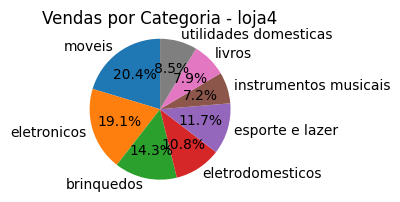

In [ ]:
vendas_por_categoria = vendas_categoria(lojas)

for loja in vendas_por_categoria.columns:
    plt.figure(figsize=(2,2))
    plt.pie(vendas_por_categoria[loja], labels=vendas_por_categoria.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Vendas por Categoria - {loja}')
    plt.axis('equal')
    plt.show()

As vendas por categoria indicam um desempenho consistente da Loja1 em segmentos de alto valor agregado, como móveis (465 unidades), eletrônicos (448) e eletrodomésticos (312). A Loja3 também se destaca em móveis (499) e eletrônicos (451), enquanto a Loja4 apresenta desempenho mais modesto, especialmente em eletrodomésticos (254).

**2.3 Avaliação Média dos Clientes**

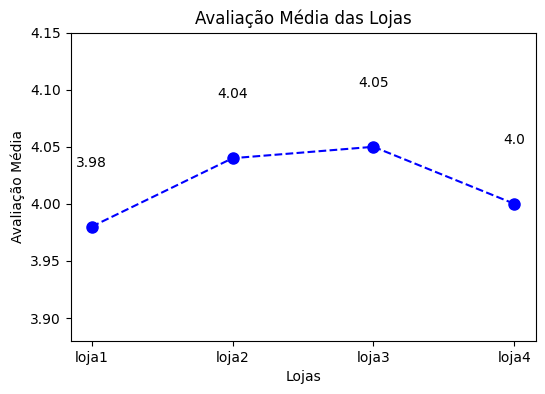

In [ ]:
avaliacoes = avaliacao_media(lojas)

plt.figure(figsize=(6, 4))
plt.plot(avaliacoes.index, avaliacoes.values, color='blue', linestyle='--', marker='o', markersize=8)
plt.xlabel("Lojas")
plt.ylabel("Avaliação Média")
plt.title("Avaliação Média das Lojas")
plt.ylim(avaliacoes.min() - 0.1, avaliacoes.max() + 0.1)

for i, v in enumerate(avaliacoes.values):
    plt.text(i, v + 0.05, str(v), ha='center', va='bottom')

plt.show()

As avaliações demonstram maior satisfação por parte dos clientes da Loja3 e Loja2. A Loja1 apresenta a menor nota, o que pode sinalizar pontos de melhoria em atendimento ou pós-venda.

**2.4 Análise de Produtos com Maior e Menor Rotação**

In [ ]:
maior_menor

,Mais vendidos,Menos vendidos
loja1,Guarda roupas,Celular ABXY
loja2,Iniciando em programação,Jogo de tabuleiro
loja3,Kit banquetas,Blocos de montar
loja4,Cama box,Guitarra


Itens de alto giro, como guarda-roupas e cama box, indicam boa estratégia de sortimento. Entretanto, produtos com baixa demanda podem representar estoque ocioso e imobilização de capital.

**2.5 Frete Médio (R$)**

In [ ]:
frete

,Frete médio
loja1,34.69
loja2,33.62
loja3,33.07
loja4,31.28


A Loja4 apresenta o menor custo logístico médio por entrega, o que pode representar vantagem competitiva em ambientes sensíveis a preço. No entanto, essa eficiência não se converte em maior volume de faturamento.

**3. Conclusão e Reavaliação Estratégica**

A Loja1 pode ser vista como candidata à venda por apresentar o maior valor de mercado, baseando-se em seu faturamento elevado e desempenho robusto em categorias-chave. No entanto, sob uma perspectiva estratégica, outras opções devem ser consideradas:

Venda da Loja4: Justificável pela performance mais fraca em todos os indicadores principais. Trata-se de um ativo com menor valor agregado, cuja alienação pode liberar recursos e otimizar a eficiência operacional do conjunto.

Venda de Loja intermediária (Loja2 ou Loja3): Pode representar uma decisão equilibrada, conciliando valor de revenda razoável com impacto moderado no faturamento total.

Recomendação Final: Recomenda-se a venda da Loja4, considerando seu desempenho inferior em faturamento, avaliação dos clientes, e volume de vendas em categorias de alto valor. Tal decisão contribui para a racionalização do portfólio, aumento da eficiência operacional e potencializa a alocação de recursos nas lojas com maior desempenho.

Caso o objetivo principal seja a geração de receita imediata, a venda da Loja1 permanece uma opção válida, embora implique na perda de um ativo altamente lucrativo.